In [11]:
your_local_path = "D:/ML/Practice/"

In [12]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Create dataframe for the dataset
churn_data_df = pd.read_csv(your_local_path +"latest.csv")

In [14]:
# Display columns in the dataframe
churn_data_df.head()

,Unnamed: 0,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
0,0,70171228,2,M,1,VDSL,137.98,216,N,202003.0
1,1,70099932,1,NaN,11,RBS,94.00,219,N,202007.0
2,2,70109566,1,NaN,15,RBS,126.00,221,N,202107.0
3,3,70283270,1,M,15,VDSL,77.00,219,N,202001.0
4,4,70116504,1,NaN,11,VDSL,128.99,221,N,202008.0


In [15]:
# Dropping the unnamed column
churn_data_df.drop([churn_data_df.columns[0]], axis='columns', inplace = True)
churn_data_df.head()

,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
0,70171228,2,M,1,VDSL,137.98,216,N,202003.0
1,70099932,1,NaN,11,RBS,94.00,219,N,202007.0
2,70109566,1,NaN,15,RBS,126.00,221,N,202107.0
3,70283270,1,M,15,VDSL,77.00,219,N,202001.0
4,70116504,1,NaN,11,VDSL,128.99,221,N,202008.0


In [16]:
# Display null values in the dataset
churn_data_df.isna().sum()

acct_no                0
cont_no                0
gender             30346
bill_cycl              0
serv_type              0
secured_revenue    17378
tenure                 0
churn                  0
contract_end       16905
dtype: int64

Gender column has quite a few null values.

In [17]:
# Handling null values in Gender column 
churn_data_df = churn_data_df.dropna(axis=0, subset=['gender'])


In [18]:
churn_data_df.isna().sum()

acct_no               0
cont_no               0
gender                0
bill_cycl             0
serv_type             0
secured_revenue    6370
tenure                0
churn                 0
contract_end       4967
dtype: int64

In [19]:
# Filling NaN values with 0 for secured revenue and contract_end columns
churn_data_df['secured_revenue'].fillna(0, inplace=True)
churn_data_df['contract_end'].fillna(0, inplace=True)

In [20]:
churn_data_df.isna().sum()

acct_no            0
cont_no            0
gender             0
bill_cycl          0
serv_type          0
secured_revenue    0
tenure             0
churn              0
contract_end       0
dtype: int64

In [21]:
churn_data_df.head()

,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
0,70171228,2,M,1,VDSL,137.98,216,N,202003.0
3,70283270,1,M,15,VDSL,77.00,219,N,202001.0
5,70032404,1,M,11,RBS,128.34,225,N,202204.0
6,70195318,1,M,1,RBS,174.00,216,N,202103.0
8,70224076,1,M,11,VDSL,90.45,220,N,202104.0


In [22]:
churn_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248059 entries, 0 to 278404
Data columns (total 9 columns):
acct_no            248059 non-null int64
cont_no            248059 non-null int64
gender             248059 non-null object
bill_cycl          248059 non-null int64
serv_type          248059 non-null object
secured_revenue    248059 non-null float64
tenure             248059 non-null int64
churn              248059 non-null object
contract_end       248059 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 18.9+ MB


In [23]:
churn_data_df.describe()

,acct_no,cont_no,bill_cycl,secured_revenue,tenure,contract_end
count,2.480590e+05,248059.000000,248059.000000,248059.000000,248059.000000,248059.000000
mean,9.149096e+07,1.342975,17.259991,126.275963,67.595310,198028.509661
std,7.266804e+06,11.249306,7.254002,58.904122,55.084237,28306.876215
min,7.000274e+07,1.000000,1.000000,0.000000,0.000000,0.000000
25%,9.191893e+07,1.000000,11.000000,94.000000,20.000000,202007.000000
50%,9.447447e+07,1.000000,18.000000,120.050000,51.000000,202101.000000
75%,9.548646e+07,1.000000,25.000000,147.980000,105.000000,202109.000000
max,9.647528e+07,513.000000,25.000000,2612.000000,230.000000,202305.000000


In [24]:
churn_data_df.head()

,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
0,70171228,2,M,1,VDSL,137.98,216,N,202003.0
3,70283270,1,M,15,VDSL,77.00,219,N,202001.0
5,70032404,1,M,11,RBS,128.34,225,N,202204.0
6,70195318,1,M,1,RBS,174.00,216,N,202103.0
8,70224076,1,M,11,VDSL,90.45,220,N,202104.0


In [25]:
churn_data_df.churn.value_counts()

N    246795
Y      1264
Name: churn, dtype: int64

Dataset has more Churn = 'N' rows when compared to Churn = 'Y'. Clearly we have imbalanced data. Model created with this will be biased

In [26]:
# Taking categorical columns
churn_cat_df = churn_data_df[['gender', 'serv_type', 'churn']]
churn_cat_df.head()

,gender,serv_type,churn
0,M,VDSL,N
3,M,VDSL,N
5,M,RBS,N
6,M,RBS,N
8,M,VDSL,N


In [27]:
# Feature Engineering
# Creating dummy columns for categorical values 
churn_catcols = pd.get_dummies(churn_cat_df )

In [28]:
# When dummy columns are created, we can drop Churn_Y
churn_catcols.drop(['churn_Y'], axis = 1, inplace = True)
churn_catcols.head()

,gender_F,gender_M,serv_type_ADSL,serv_type_RBS,serv_type_VDSL,churn_N
0,0,1,0,0,1,1
3,0,1,0,0,1,1
5,0,1,0,1,0,1
6,0,1,0,1,0,1
8,0,1,0,0,1,1


In [29]:
# When dummy columns are created, we can drop gender_F
churn_catcols.drop(['gender_F'], axis = 1, inplace = True)
churn_catcols.drop(['serv_type_ADSL'], axis = 1, inplace = True)
churn_catcols.head()

,gender_M,serv_type_RBS,serv_type_VDSL,churn_N
0,1,0,1,1
3,1,0,1,1
5,1,1,0,1
6,1,1,0,1
8,1,0,1,1


In [30]:
# When dummy columns are created, we can drop gender, serv_type and churn columns from the dataframe
num_df = churn_data_df.drop(['acct_no','cont_no','gender','serv_type','churn'], axis = 1)

In [31]:
churn_data_imbalanced_df = pd.concat([num_df, churn_catcols], axis = 1)

In [32]:
churn_data_imbalanced_df.head()

,bill_cycl,secured_revenue,tenure,contract_end,gender_M,serv_type_RBS,serv_type_VDSL,churn_N
0,1,137.98,216,202003.0,1,0,1,1
3,15,77.00,219,202001.0,1,0,1,1
5,11,128.34,225,202204.0,1,1,0,1
6,1,174.00,216,202103.0,1,1,0,1
8,11,90.45,220,202104.0,1,0,1,1


In [33]:
# Create Logistic Regression model
y = churn_data_imbalanced_df["churn_N"].values

X = churn_data_imbalanced_df.drop(['churn_N'], axis=1)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)
print(logreg.coef_)
print(logreg.intercept_)


[[ 2.08776252e-02 -1.80560377e-04  6.91818823e-03  1.17305366e-04
   1.15044220e-03  1.22260089e-03 -7.68915273e-05]]
[0.00115044]


In [35]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=12345)

In [36]:
logreg.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
y_pred_test = logreg.predict(xTest)

In [38]:
print(metrics.accuracy_score(yTest, y_pred_test))
print(metrics.recall_score(yTest, y_pred_test))

0.9947727700287565
1.0


In [39]:
conf = metrics.confusion_matrix(yTest, y_pred_test)
conf

array([[    0,   389],
       [    0, 74029]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(yTest, y_pred_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       389
          1       0.99      1.00      1.00     74029

avg / total       0.99      0.99      0.99     74418



C:\Users\premy_unni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Will try Undersampling the dataset

In [41]:
churn = len(churn_data_df[churn_data_df['churn'] == 'Y'])

In [42]:
# Get indices of non churn data
non_churn_indices = churn_data_df[churn_data_df.churn == 'N'].index

In [43]:
# Random sample of non churn data
random_indices = np.random.choice(non_churn_indices,churn, replace=False)

In [44]:
# Find indices of churn data
churn_indices = churn_data_df[churn_data_df.churn == 'Y'].index

In [45]:
under_sample_indices = np.concatenate([churn_indices,random_indices])

In [46]:
churn_under_sample = churn_data_df.loc[under_sample_indices]

In [47]:
churn_under_sample.head()

,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
567,72760739,1,M,11,VDSL,69.0,172,Y,0.0
575,72863400,1,M,15,RBS,169.0,182,Y,0.0
618,72817273,1,M,1,RBS,269.0,183,Y,0.0
813,73797581,1,M,11,RBS,269.0,170,Y,0.0
893,74028879,1,M,1,RBS,169.0,168,Y,0.0


In [48]:
churn_under_sample.churn.value_counts()

Y    1264
N    1264
Name: churn, dtype: int64

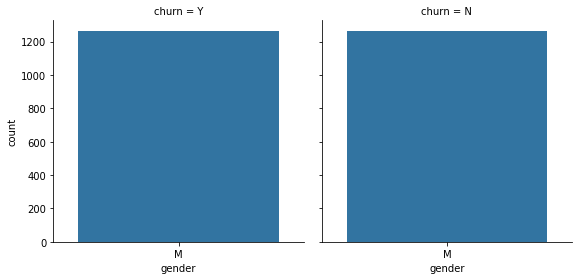

In [49]:
sns.factorplot(x='gender', col='churn', kind='count', data=churn_under_sample);

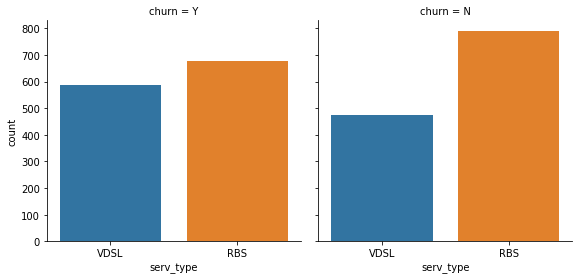

In [50]:
sns.factorplot(x='serv_type', col='churn', kind='count', data=churn_under_sample);

In [51]:
# Taking categorical columns
churn_cat_under_df = churn_under_sample[['gender', 'serv_type', 'churn']]
churn_cat_under_df.head()

,gender,serv_type,churn
567,M,VDSL,Y
575,M,RBS,Y
618,M,RBS,Y
813,M,RBS,Y
893,M,RBS,Y


In [52]:
# Creating dummy columns for categorical values 
churn_catcols_under = pd.get_dummies(churn_cat_under_df )
churn_catcols_under.tail()

,gender_M,serv_type_RBS,serv_type_VDSL,churn_N,churn_Y
41669,1,1,0,1,0
81245,1,1,0,1,0
188458,1,0,1,1,0
262988,1,1,0,1,0
67904,1,1,0,1,0


In [53]:
# Can drop churn_Y column.
churn_catcols_under.drop(['churn_Y'], axis = 1, inplace = True)
churn_catcols_under.head()

,gender_M,serv_type_RBS,serv_type_VDSL,churn_N
567,1,0,1,0
575,1,1,0,0
618,1,1,0,0
813,1,1,0,0
893,1,1,0,0


In [54]:
churn_catcols_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528 entries, 567 to 67904
Data columns (total 4 columns):
gender_M          2528 non-null uint8
serv_type_RBS     2528 non-null uint8
serv_type_VDSL    2528 non-null uint8
churn_N           2528 non-null uint8
dtypes: uint8(4)
memory usage: 109.6 KB


In [55]:
churn_catcols_under.head()

,gender_M,serv_type_RBS,serv_type_VDSL,churn_N
567,1,0,1,0
575,1,1,0,0
618,1,1,0,0
813,1,1,0,0
893,1,1,0,0


In [56]:
# Dummy columns created for gender, serv_type and churn columns. So dropping the original columns from dataframe
num_df = churn_under_sample.drop(['acct_no','gender','cont_no','serv_type','churn'], axis = 1)

In [57]:
num_df.head()

,bill_cycl,secured_revenue,tenure,contract_end
567,11,69.0,172,0.0
575,15,169.0,182,0.0
618,1,269.0,183,0.0
813,11,269.0,170,0.0
893,1,169.0,168,0.0


In [58]:
# Concatenating dummy columns with other columns in dataframe
churn_final_df = pd.concat([num_df, churn_catcols_under], axis = 1)

In [59]:
churn_final_df.head()

,bill_cycl,secured_revenue,tenure,contract_end,gender_M,serv_type_RBS,serv_type_VDSL,churn_N
567,11,69.0,172,0.0,1,0,1,0
575,15,169.0,182,0.0,1,1,0,0
618,1,269.0,183,0.0,1,1,0,0
813,11,269.0,170,0.0,1,1,0,0
893,1,169.0,168,0.0,1,1,0,0


In [60]:
churn_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528 entries, 567 to 67904
Data columns (total 8 columns):
bill_cycl          2528 non-null int64
secured_revenue    2528 non-null float64
tenure             2528 non-null int64
contract_end       2528 non-null float64
gender_M           2528 non-null uint8
serv_type_RBS      2528 non-null uint8
serv_type_VDSL     2528 non-null uint8
churn_N            2528 non-null uint8
dtypes: float64(2), int64(2), uint8(4)
memory usage: 188.6 KB


In [61]:
# Creating logistic regression model
y = churn_final_df["churn_N"].values

X = churn_final_df.drop(['churn_N'], axis=1)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)
print(logreg.coef_)
print(logreg.intercept_)


[[-0.01374697 -0.00947962 -0.03150341  0.00012208 -0.00067384 -0.00038133
  -0.00029251]]
[-0.00067384]


In [63]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=12345)

In [64]:
logreg.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
print(logreg.coef_)
print(logreg.intercept_)

[[-0.01356564 -0.00897411 -0.03073827  0.00012044 -0.00066773 -0.00036123
  -0.0003065 ]]
[-0.00066773]


In [66]:
y_pred_test = logreg.predict(xTest)

In [67]:
print(metrics.accuracy_score(yTest, y_pred_test))
print(metrics.recall_score(yTest, y_pred_test))

0.9960474308300395
0.9918478260869565


In [68]:
conf = metrics.confusion_matrix(yTest, y_pred_test)
conf

array([[391,   0],
       [  3, 365]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report

print(classification_report(yTest, y_pred_test))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       391
          1       1.00      0.99      1.00       368

avg / total       1.00      1.00      1.00       759



From the score , model appears to be biased and cannot be considered for unseen data. Will try other methods

In [70]:
# Try with Randomforest model on the imbalanced data
churn_data_df.head()

,acct_no,cont_no,gender,bill_cycl,serv_type,secured_revenue,tenure,churn,contract_end
0,70171228,2,M,1,VDSL,137.98,216,N,202003.0
3,70283270,1,M,15,VDSL,77.00,219,N,202001.0
5,70032404,1,M,11,RBS,128.34,225,N,202204.0
6,70195318,1,M,1,RBS,174.00,216,N,202103.0
8,70224076,1,M,11,VDSL,90.45,220,N,202104.0


In [71]:
churn_data_imbalanced_df.head()

,bill_cycl,secured_revenue,tenure,contract_end,gender_M,serv_type_RBS,serv_type_VDSL,churn_N
0,1,137.98,216,202003.0,1,0,1,1
3,15,77.00,219,202001.0,1,0,1,1
5,11,128.34,225,202204.0,1,1,0,1
6,1,174.00,216,202103.0,1,1,0,1
8,11,90.45,220,202104.0,1,0,1,1


In [74]:
y = churn_data_imbalanced_df['churn_N'].values
X = churn_data_imbalanced_df.drop(['churn_N'], axis=1)

In [76]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest  = train_test_split(X,y, test_size = 0.30, random_state = 12345, stratify = y)

In [77]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini', n_estimators = 100, max_depth = 10, min_samples_split=2, min_samples_leaf = 3, random_state=12345, class_weight = 'balanced')

In [78]:
my_forest = forest.fit(xTrain, yTrain)

In [79]:
print(my_forest.score(xTrain, yTrain))

0.9886547531976895


In [80]:
y_pred_test = my_forest.predict(xTest)

In [81]:
from sklearn.metrics import confusion_matrix
df_confusion = confusion_matrix(yTest, y_pred_test)

In [82]:
df_confusion

array([[  372,     7],
       [  812, 73227]], dtype=int64)

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
print(accuracy_score(yTest, y_pred_test))

0.9889945980811095


In [85]:
print(metrics.recall_score(yTest, y_pred_test))

0.9890328070341307


In [86]:
from sklearn.metrics import classification_report

print(classification_report(yTest, y_pred_test))

             precision    recall  f1-score   support

          0       0.31      0.98      0.48       379
          1       1.00      0.99      0.99     74039

avg / total       1.00      0.99      0.99     74418

